## Example

In this simple example, we load an image, pre-process it, and classify it with a pretrained EfficientNet.

In [3]:
import json
from PIL import Image

import torch
from torchvision import transforms

from efficientnet_pytorch import EfficientNet

In [2]:
!pip install efficientnet_pytorch


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.0 MB/s eta 0:00:00
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=9b590211326baf2bae9e078580a4f4ac36b9ca6135c4e4475

In [4]:
model_name = 'efficientnet-b0'
image_size = EfficientNet.get_image_size(model_name) # 224

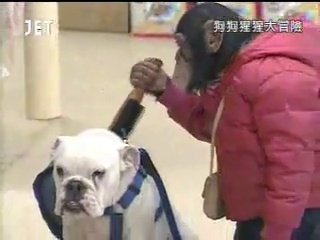

In [6]:
# Open image
img = Image.open('/content/frame_6 - copia.jpg')
img

In [7]:
# Preprocess image
tfms = transforms.Compose([transforms.Resize(image_size), transforms.CenterCrop(image_size),
                           transforms.ToTensor(),
                           transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])
img = tfms(img).unsqueeze(0)

In [9]:
# Load class names
labels_map = json.load(open('/content/labels_map.txt'))
labels_map = [labels_map[str(i)] for i in range(1000)]

In [10]:
# Classify with EfficientNet
model = EfficientNet.from_pretrained(model_name)
model.eval()
with torch.no_grad():
    logits = model(img)
preds = torch.topk(logits, k=5).indices.squeeze(0).tolist()

print('-----')
for idx in preds:
    label = labels_map[idx]
    prob = torch.softmax(logits, dim=1)[0, idx].item()
    print('{:<75} ({:.2f}%)'.format(label, prob*100))

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 168MB/s]


Loaded pretrained weights for efficientnet-b0
-----
French bulldog                                                              (36.53%)
boxer                                                                       (30.85%)
bull mastiff                                                                (6.71%)
Boston bull, Boston terrier                                                 (2.59%)
Staffordshire bullterrier, Staffordshire bull terrier                       (2.00%)
